# Text Simplification Dataset Analysis

We will be using FRE (Flesch Reading Ease), a score indicating text readability, and FK (Flesch-Kincaid Grade Level), a grade level representing the education needed to understand text, to analyze and improve our dataset.

- **FRE (Flesch Reading Ease):** A score indicating how easy a text is to read; higher scores mean easier text. We'll use it to measure readability improvements in simplified sentences.
- **FK (Flesch-Kincaid Grade Level):** A grade level representing the education needed to understand a text; lower grades mean easier text. We'll use it to assess the difficulty reduction in our dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
df = pd.read_csv("with_readability.csv")

## Sentence Length Analysis

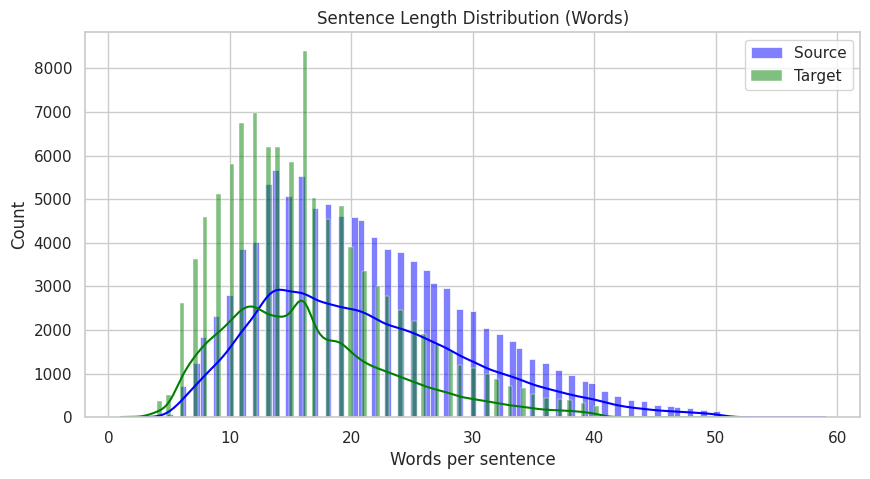

In [2]:
df['source_len'] = df['source_text'].apply(lambda x: len(x.split()))
df['target_len'] = df['target_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
sns.histplot(df['source_len'], color='blue', label='Source', kde=True)
sns.histplot(df['target_len'], color='green', label='Target', kde=True)
plt.title("Sentence Length Distribution (Words)")
plt.xlabel("Words per sentence")
plt.legend()
plt.show()


Key points:

- Target sentences are mostly very short: The tallest bar (about 8000 sentences) is for 10-20 words. Counts drop quickly after that, with almost none over 40 words.
- Source sentences are longer on average: They start low at short lengths but peak higher around 20–30 words , and a few stretch out to 40+ words.


## Readability Analysis (FK & FRE)



1. Flesch-Kincaid Grade Level Distribution

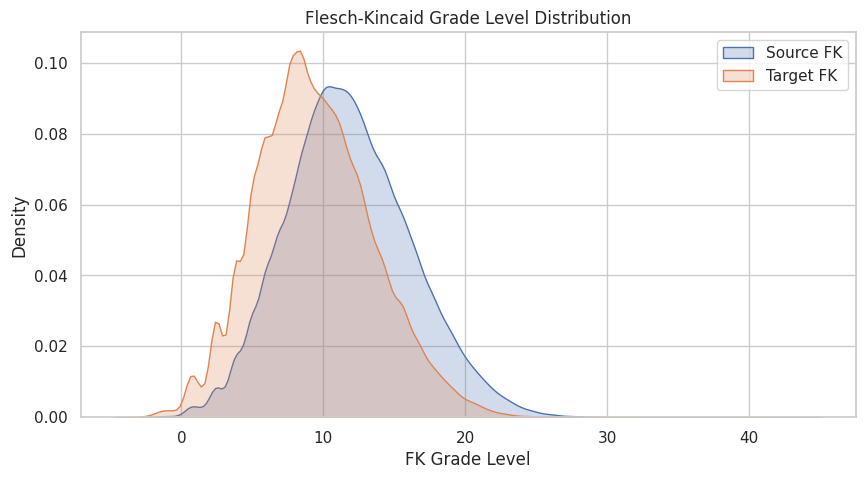

In [3]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['fk_source'], label="Source FK", fill=True)
sns.kdeplot(df['fk_target'], label="Target FK", fill=True)
plt.title("Flesch-Kincaid Grade Level Distribution")
plt.xlabel("FK Grade Level")
plt.legend()
plt.show()

2. Flesch Reading Ease Distribution

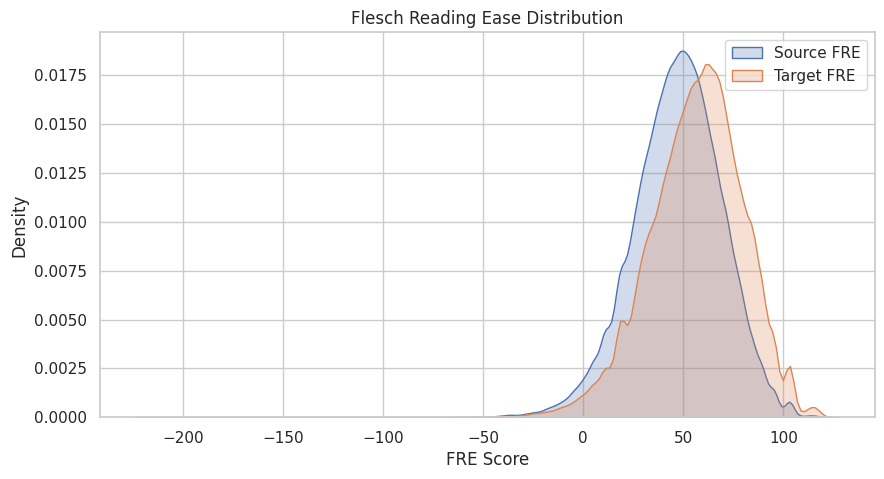

In [4]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['fre_source'], label="Source FRE", fill=True)
sns.kdeplot(df['fre_target'], label="Target FRE", fill=True)
plt.title("Flesch Reading Ease Distribution")
plt.xlabel("FRE Score")
plt.legend()
plt.show()

- The first graph (Flesch-Kincaid Grade Level Distribution) shows that source sentences (blue) have a peak FK grade level around 10-15, while target sentences (orange) peak lower, around 5-10 **Conclusion** :target sentences are generally easier to read.

- The second graph (Flesch Reading Ease Distribution) shows that source FRE scores (blue) peak around 0 to 50, while target FRE scores (orange) peak higher, around 50 to 100
**Conclusion**: suggesting target sentences are easier to understand as higher FRE scores indicate greater readability.

## FK/FRE differences


In [5]:
df['fk_diff'] = df['fk_source'] - df['fk_target']
df['fre_diff'] = df['fre_target'] - df['fre_source']

print("Average FK reduction:", df['fk_diff'].mean())
print("Average FRE increase:", df['fre_diff'].mean())

Average FK reduction: 2.3824796403470185
Average FRE increase: 9.373101916352294


The average FK grade level decreases by about 2.38, making sentences easier to read, while the average FRE score increases by about 9.37, indicating improved readability.

1. Distribution of FK Reduction

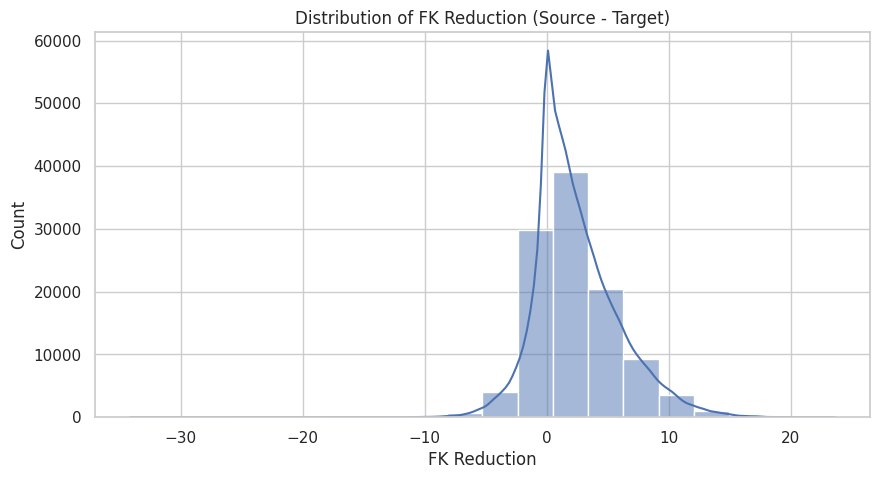

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(df['fk_diff'], bins=20, kde=True)
plt.title("Distribution of FK Reduction (Source - Target)")
plt.xlabel("FK Reduction")
plt.show()

2. Distribution of FRE Increase

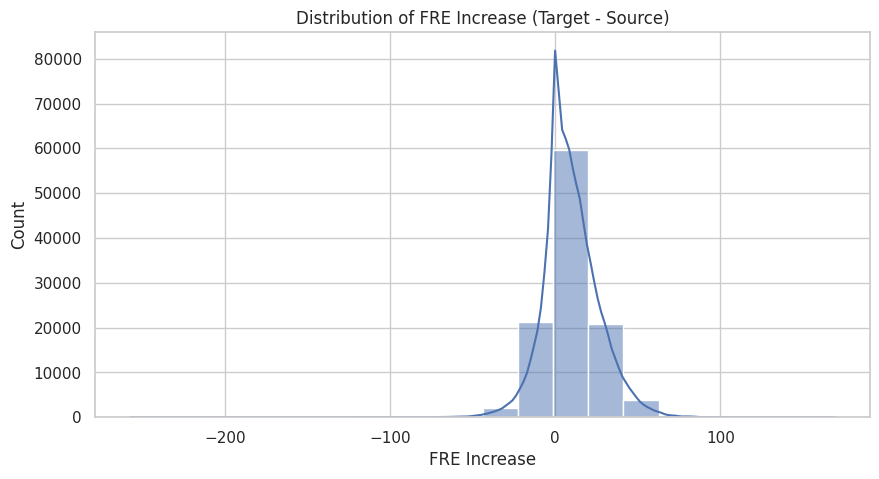

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(df['fre_diff'], bins=20, kde=True)
plt.title("Distribution of FRE Increase (Target - Source)")
plt.xlabel("FRE Increase")
plt.show()

- The first graph (FRE Increase) shows most sentences have an FRE increase (Target - Source) around 0 to 100, with a sharp peak near 0    
**Conclusion**: many sentences remain similar in readability, though some improve significantly.


- The second graph (FK Reduction) shows most sentences have an FK reduction (Source - Target) around 0 to 10, with a peak near 0     
**Conclusion**: many sentences have little change in difficulty, but some are simplified by up to 10 grade levels.

## Correlation Analysis
Check relation between sentence length and readability

Correlation between source sentence length and FK: 0.6924043793395983
Correlation between source sentence length and FRE: -0.33258464870781634


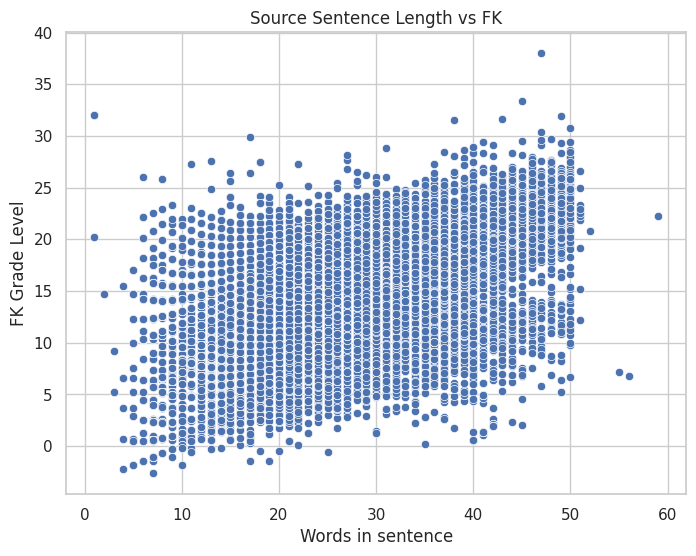

In [8]:
cor_len_fk_source = df['source_len'].corr(df['fk_source'])
cor_len_fre_source = df['source_len'].corr(df['fre_source'])

print("Correlation between source sentence length and FK:", cor_len_fk_source)
print("Correlation between source sentence length and FRE:", cor_len_fre_source)

plt.figure(figsize=(8,6))
sns.scatterplot(x='source_len', y='fk_source', data=df)
plt.title("Source Sentence Length vs FK")
plt.xlabel("Words in sentence")
plt.ylabel("FK Grade Level")
plt.show()

Most sentences cluster between 10-30 words with FK grades of 5-20, indicating moderate length and difficulty. Longer sentences (over 40 words) tend to have higher FK grades (up to 40), suggesting increased difficulty.

# Conclusion
Based on the analyzed graphs and metrics, the text simplification dataset effectively reduces reading difficulty.
- Source sentences, averaging 10-30 words with FK grades of 10-15 and FRE scores around 0-50, are simplified into target sentences with lower FK grades (average reduction of 2.38) and higher FRE scores (average increase of 9.37), peaking around 5-10 and 50-100, respectively.
- Overall, longer source sentences correlate with higher difficulty, and the simplification process successfully lowers this complexity for many cases.
